# Temperature in RICE and FUND

## Load packages

In [1]:
using Mimi, DataFrames, VegaLite, Query

## Load models

In [2]:
using MimiRICE2010, MimiFUND

## Run FUND and RICE

In [3]:
m_fund = MimiFUND.getfund()
run(m_fund)

In [4]:
m_rice = MimiRICE2010.getrice()
run(m_rice)

## Extract data from models and reshape for plotting

In [5]:
df_fund = getdataframe(m_fund, :climatedynamics, :temp) |> @rename(:time=>:year, :temp=>:temperature) |> @mutate(model="FUND") |> DataFrame
df_rice = getdataframe(m_rice, :climatedynamics, :TATM) |> @rename(:time=>:year, :TATM=>:temperature) |> @mutate(model="RICE") |> DataFrame
df = vcat(df_fund, df_rice);

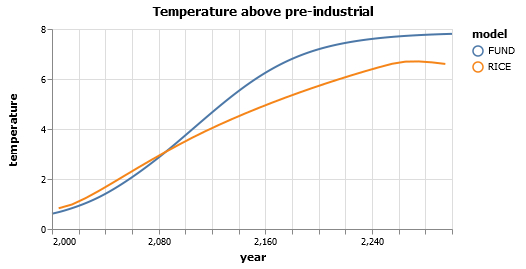

In [6]:
df |> @filter(2000 <= _.year <= 2300) |> @vlplot(:line, x=:year, y=:temperature, color=:model, width=400, width=400, title="Temperature above pre-industrial")